## Анализ продаж и пользователей маркетплейса

**Цель проекта:** 

Быстрая оценка и контроль ключевых показателей для повышения эффективности продаж, оптимизации ассортимента и удержания пользователей.

**Описание данных**

Исследование проводится на данных, включающих информацию о категориях товаров, заказах и их позициях, каталоге продуктов, транзакциях (платежах и возвратах), отзывах пользователей, а также данных о покупателях и продавцах.


**Содержание проекта**
- [Загрузка данных и общая информация](#загрузка-данных-и-общая-информация)
- [Подготовка данных](#подготовка-данных)
- [Исследовательский анализ](#исследовательский-анализ)
- [Выгрузка данных](#выгрузка-данных)

## Загрузка данных и общая информация

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [4]:
# Выгружаем данные
# Таблица пользователей
users = pd.read_csv('users.csv')

# Таблица транзакций
transactions = pd.read_csv('transactions.csv')

# Таблица отзывов
reviews = pd.read_csv('reviews.csv')

# Таблица товаров
products = pd.read_csv('products.csv')

# Таблица заказов
orders = pd.read_csv('orders.csv')

# Таблица позиций в заказах (товары в заказах)
order_items = pd.read_csv('order_items.csv')

# Таблица категорий товаров
categories = pd.read_csv('categories.csv')


In [5]:
# Выводим первые строки всех датафреймов
display(users.head())
display(transactions.head())
display(reviews.head())
display(products.head())
display(orders.head())
display(order_items.head())
display(categories.head())

,user_id,name,email,phone,user_type,registration_date,is_active
0,d447326f-e55e-4eb1-8401-222deb8539fd,Patrick Sanchez,jillrhodes@example.net,296-500-1338,buyer,2024-10-19 06:39:46.000,True
1,bf50f4dd-8e31-47e9-b3f4-f0ffcfa9a167,Kimberly Robinson,lisa02@example.net,(254)923-5116x15594,seller,2024-12-17 18:27:22.000,True
2,3290a5be-9ced-4e7b-9068-b3a884b4f021,Thomas Miller,maria95@example.net,610.934.1316,buyer,2024-07-31 02:53:58.000,True
3,630a0e61-8be5-4a18-a7e6-7e22c56a9a21,Carla Kelly,jacqueline19@example.net,(783)227-6483,buyer,2024-10-16 08:54:00.000,True
4,e9e71002-986f-496c-a4c0-12632edf8ea0,Renee Morales,clarksherri@example.net,837-767-2423x88496,seller,2023-12-05 12:38:55.000,True


,transaction_id,user_id,amount,transaction_type,transaction_date
0,2bb73129-84ce-48f0-9550-e123ef9aec69,879926c8-c9cb-4ee5-a4b6-108dcbae85be,121.94,payout,2025-03-13 20:49:20.000
1,7ea0e3cf-ff3a-4476-a889-1a7f7e31bb8d,8a5f444c-c7bd-46ff-bd15-dd765bd77115,900.36,payment,2025-04-29 18:01:23.000
2,09db96bb-8ecf-4ad4-a24d-5aa85b6e2c20,ea224611-be68-4151-b681-5e19a019e9c3,-283.42,payout,2024-12-24 12:13:00.000
3,ac97bcac-59a1-41ef-b157-076426af2e19,f3fb3feb-8623-438e-9ed3-5e98060f7d91,210.62,payout,2025-04-05 07:15:09.000
4,2ce23859-0181-4c0f-b3cf-c25acca56467,17da5324-6730-4808-a341-43a9bf74664c,744.45,payout,2024-09-19 20:18:40.000


,review_id,user_id,product_id,rating,comment,review_date
0,92e9eb35-0063-448c-a407-47e99530eb99,5fcf22b3-2788-4102-a3f4-7721d92d923f,77ac4b77-b310-47cc-873b-66e6a0ced5a1,2,Another gun wide read former.,2025-02-12 05:12:04.000
1,78864309-374c-4499-adbd-63e7ed1f604e,0f1a1211-70c9-42ec-8dca-1c56b9bd8206,13c4fcfe-bd79-49ac-a666-1e19507b9896,3,Ahead offer such when.,2024-07-05 16:19:28.000
2,239fea6e-b3aa-4786-8bff-563bae3400c4,f59d2104-5752-4b16-91be-b2dec691c978,5dcf670c-c917-43e4-859b-86cbc78cfef1,2,Type require now appear.,2024-01-29 02:48:17.000
3,b7e67361-947c-48cd-8586-be4806a0d460,5bce0123-4c46-4aef-a71a-02b276a47f57,941568fb-88e9-40ad-8a89-37457c667fd3,2,Attorney beyond newspaper year your.,2025-02-03 13:28:40.000
4,b6a009ff-f752-497a-8b3f-929abc73007c,04a6dd69-1ea0-4a41-8c6a-93a8c8b71b8f,79ba5821-ac61-4902-9cc8-01bdfe29a8e9,4,Your hard law loss relationship however husband.,2024-07-22 05:21:30.000


,product_id,title,description,category_id,price,stock_quantity,seller_id
0,eabfaf47-5fe4-466c-ba3d-026f0f4b13f4,Amount,War nor provide situation. Break concern final.,230,825.25,892,3b3d1b4e-3317-43f6-871a-94fea2cbcf30
1,966d61df-3cbd-4239-92b8-d9a0a7485874,Least,Allow recognize western six campaign including.,632,523.01,269,24ca1b48-5ab3-4498-8c64-115d96c669a9
2,b77f8466-3068-4d38-aed3-b5db8e8c14db,Simply,Authority deal space few.,528,842.30,730,cc334b15-6fc9-40c4-9355-f70a41b0d92e
3,f9fd17e7-435a-40db-816d-3d74f59f61b8,Lawyer,Difficult rise politics cell.,512,896.47,775,907fecb4-545b-46e9-bc2a-fda54ffed199
4,7a795939-fba8-4377-9761-b5c2a4afbdea,Keep,Worker rest whether bit arm issue everyone.,1137,943.10,543,510a9e6f-4018-4fcb-a50e-5e8dadd44ab5


,order_id,buyer_id,order_date,status,total_amount
0,2299f3d1-f01e-4d6a-ad54-c9a74bff0c02,bc69766f-aab2-469c-b24f-4b00151aa519,2025-04-27 10:27:18.000,paid,4674.51
1,186fdd71-4ddf-4198-9162-c71febc7bc05,e421a631-2faf-4810-8a81-7f377d728eff,2025-02-24 15:08:42.000,new,1575.70
2,4ab13c5e-924a-43f1-a77a-17d28bd0f6f6,319b30cf-0ef0-4e8e-a1bc-ca83136b59cc,2024-01-16 04:13:06.000,canceled,2048.65
3,11bd972e-20a2-4ce7-96fb-bb4ed47c4614,fbff34d4-644d-456b-9331-833d1aa58a9e,2025-04-09 09:32:46.000,shipped,5267.75
4,2ff312f2-e2a2-4b17-a94c-e29211206728,7651578e-fa3b-4888-9000-2d1e607712cf,2025-06-08 12:58:51.000,shipped,1560.81


,order_item_id,order_id,product_id,quantity,price_at_order_time
0,4633224a-eb5b-4c2e-a568-8e5f3676d839,98895f4d-611c-41d2-88f5-78a5b58c78b5,ba66791e-60f0-43f2-8d1d-a84e6b047657,2,279.71
1,d68dbbb4-0323-447f-9afb-9e2def518732,fbc1d88b-aa81-43e6-b156-b2f4a8d9ec8a,e0a10065-76ac-4557-8638-2dfe422f415f,1,314.66
2,d38e7218-e244-4afe-97f9-0ba0492eaf57,fbc1d88b-aa81-43e6-b156-b2f4a8d9ec8a,0d122bb3-888c-4fcc-8609-057c9c3ed2e8,3,145.99
3,ab970c22-4625-4944-9e73-5fdbc04a9928,fbc1d88b-aa81-43e6-b156-b2f4a8d9ec8a,ef894d8e-a749-43a8-9486-6bbfe247364a,1,955.55
4,0ffc4785-c391-48c6-932d-e85e0c552c97,928d50b8-ab93-46dc-ac42-3e57224bd0b6,ac47bd16-2356-4086-b94d-3f1b5d090174,1,585.98


,category_id,name,parent_category_id
0,0,Available,NaN
1,1,Imagine,NaN
2,2,Civil,1238.0
3,3,Six,243.0
4,4,NaN,NaN


In [6]:
# Информация о датафреймах
users.info()
transactions.info()
reviews.info()
products.info()
orders.info()
order_items.info()
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111300 entries, 0 to 111299
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            111300 non-null  object
 1   name               111300 non-null  object
 2   email              111300 non-null  object
 3   phone              111300 non-null  object
 4   user_type          111300 non-null  object
 5   registration_date  111300 non-null  object
 6   is_active          111300 non-null  bool  
dtypes: bool(1), object(6)
memory usage: 5.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811200 entries, 0 to 811199
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    811200 non-null  object 
 1   user_id           811200 non-null  object 
 2   amount            811200 non-null  float64
 3   transaction_type  811200 non-null  object 
 4   transa

## Подготовка данных

In [7]:
# Проверка на дубликаты
tables = {
    'users': users,
    'transactions': transactions,
    'reviews': reviews,
    'products': products,
    'orders': orders,
    'order_items': order_items,
    'categories': categories
}

for name, df in tables.items():
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f'В датафрейме {name} найдено дубликатов: {duplicates}')
    else:
        print(f'В датафрейме {name} дубликатов не найдено.')


В датафрейме users дубликатов не найдено.
В датафрейме transactions дубликатов не найдено.
В датафрейме reviews дубликатов не найдено.
В датафрейме products дубликатов не найдено.
В датафрейме orders дубликатов не найдено.
В датафрейме order_items дубликатов не найдено.
В датафрейме categories дубликатов не найдено.


In [8]:
# В датафреймах orders, reviews, transactions, users преобразуем столбцы с датами в тип datetime.
orders['order_date'] = pd.to_datetime(orders['order_date'])
reviews['review_date'] = pd.to_datetime(reviews['review_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
users['registration_date'] = pd.to_datetime(users['registration_date'])

In [9]:
# Проверка
display(orders.dtypes)
display(reviews.dtypes)
display(transactions.dtypes)
display(users.dtypes)

order_id                object
buyer_id                object
order_date      datetime64[ns]
status                  object
total_amount           float64
dtype: object

review_id              object
user_id                object
product_id             object
rating                  int64
comment                object
review_date    datetime64[ns]
dtype: object

transaction_id              object
user_id                     object
amount                     float64
transaction_type            object
transaction_date    datetime64[ns]
dtype: object

user_id                      object
name                         object
email                        object
phone                        object
user_type                    object
registration_date    datetime64[ns]
is_active                      bool
dtype: object

In [10]:
# Выводим строки с отрицательной ценой (аномалии)
display(products[products['price'] < 0])

# Считаем количество таких строк
display('Количество товаров с отрицательной ценой:', (products['price'] < 0).sum())

,product_id,title,description,category_id,price,stock_quantity,seller_id


'Количество товаров с отрицательной ценой:'

np.int64(0)

<div style="background-color:#e6f7ff; color:black; text-align:left; padding:2%">
В датафрейме reviews добавляем новый столбец rating_category, в котором:
High, если рейтинг ≥ 4.5;
Medium, если от 4 до 4.49;
Low, если меньше 4.

In [11]:
reviews['rating_category'] = pd.cut(
    reviews['rating'],
    bins=[-float('inf'), 3.99, 4.49, float('inf')],
    labels=['Low', 'Medium', 'High']
)

In [12]:
# Проверка
display(reviews[['rating', 'rating_category']].head(10))

,rating,rating_category
0,2,Low
1,3,Low
2,2,Low
3,2,Low
4,4,Medium
5,3,Low
6,3,Low
7,4,Medium
8,2,Low
9,4,Medium


In [13]:
# Проверяем все датафреймы на наличие пропусков
tables = {
    'users': users,
    'transactions': transactions,
    'reviews': reviews,
    'products': products,
    'orders': orders,
    'order_items': order_items,
    'categories': categories
}

for name, df in tables.items():
    print(f'--- {name} ---')
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing)
    else:
        print('Пропущенных значений не найдено.')
    print()


--- users ---
Пропущенных значений не найдено.

--- transactions ---
Пропущенных значений не найдено.

--- reviews ---
Пропущенных значений не найдено.

--- products ---
title    63
dtype: int64

--- orders ---
Пропущенных значений не найдено.

--- order_items ---
Пропущенных значений не найдено.

--- categories ---
name                    2
parent_category_id    885
dtype: int64



## Исследовательский анализ

<div style="background-color:#e6f7ff; color:black; text-align:left; padding:2%">
Считаем описательные статистики по столбцам price и stock_quantity из таблицы products чтобы увидеть общую картину

In [14]:
display(products[['price', 'stock_quantity']].describe())

,price,stock_quantity
count,52100.000000,52100.000000
mean,506.569939,500.620461
std,285.605499,287.761399
min,10.020000,0.000000
25%,260.072500,254.000000
50%,507.810000,502.000000
75%,754.180000,747.000000
max,999.990000,1000.000000


**Вывод:** Распределения по цене и остатку довольно широкие и близки к симметричным: средняя цена составляет 507, а медиана — 508. Средний остаток на складе — 501, медиана — 502. Встречаются товары с нулевым остатком (минимальное значение — 0). Цены на товары варьируются от очень доступных (минимум — 10.02) до максимальных (999.99). Межквартильный размах по цене — от 260 до 754, по остатку — от 254 до 747. Таким образом, в ассортименте есть как дешёвые, так и дорогие товары, а складские запасы колеблются от нулевых до очень больших.

<div style="background-color:#e6f7ff; color:black; text-align:left; padding:2%">
Строим гистограммы по столбцам price и stock_quantity из таблицы products чтобы увидеть форму распределения значений, выявить наиболее частые диапазоны и заметить возможные аномалии в данных.

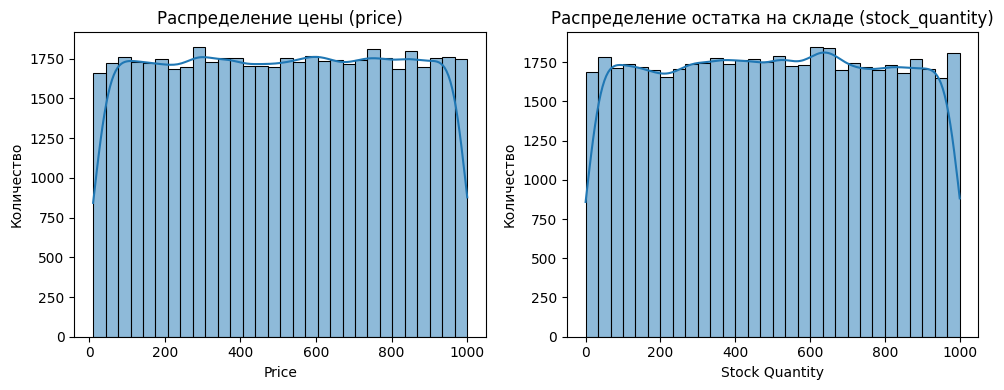

In [15]:
plt.figure(figsize=(10, 4))

# Гистограмма для price
plt.subplot(1, 2, 1)
sns.histplot(products['price'], bins=30, kde=True)
plt.title('Распределение цены (price)')
plt.xlabel('Price')
plt.ylabel('Количество')

# Гистограмма для stock_quantity
plt.subplot(1, 2, 2)
sns.histplot(products['stock_quantity'], bins=30, kde=True)
plt.title('Распределение остатка на складе (stock_quantity)')
plt.xlabel('Stock Quantity')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


**Вывод:** Распределения по цене и остатку на складе в таблице товаров практически равномерные: цены товаров лежат в диапазоне от 10 до 1000, при этом среднее значение — 507, а медиана — 508. Остатки товаров на складе распределены от 0 до 1000, среднее значение — 501, медиана — 502. В ассортименте встречаются товары с нулевым остатком. Значимых перекосов или аномалий в распределениях не наблюдается.

<div style="background-color:#e6f7ff; color:black; text-align:left; padding:2%">
Строим boxplot (ящики с усами) для признаков price и stock_quantity из таблицы products чтобы наглядно увидеть медиану, разброс значений и выбросы, а также понять, есть ли аномально дешёвые товары или избыточные складские остатки.

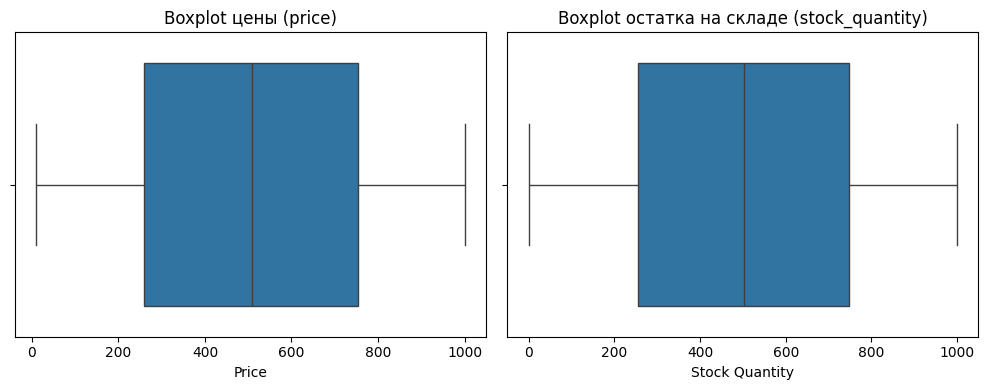

In [16]:
plt.figure(figsize=(10, 4))

# Boxplot для price
plt.subplot(1, 2, 1)
sns.boxplot(x=products['price'])
plt.title('Boxplot цены (price)')
plt.xlabel('Price')

# Boxplot для stock_quantity
plt.subplot(1, 2, 2)
sns.boxplot(x=products['stock_quantity'])
plt.title('Boxplot остатка на складе (stock_quantity)')
plt.xlabel('Stock Quantity')

plt.tight_layout()
plt.show()


**Вывод:** Оба признака имеют широкий, равномерный диапазон значений, медианы близки к середине шкалы. Существенных аномалий и экстремальных выбросов не выявлено.

<div style="background-color:#e6f7ff; color:black; text-align:left; padding:2%">
Вычисляем корреляционную матрицу между признаками price и stock_quantity в таблице products, чтобы понять, есть ли линейная зависимость между ценой товара и его остатком на складе (например, дорогие товары держат в меньших количествах, а дешёвые закупают большими партиями). Используем коэффициент корреляции Пирсона.

In [17]:
corr_matrix = products[['price', 'stock_quantity']].corr()
display(corr_matrix)

,price,stock_quantity
price,1.000000,0.000815
stock_quantity,0.000815,1.000000


**Вывод:** Корреляция между ценой товара (price) и остатком на складе (stock_quantity) практически отсутствует — коэффициент составляет 0.0008. Это значит, что цена и остаток товаров не связаны между собой линейной зависимостью и цена товара никак не влияет на то, сколько его хранится на складе, и наоборот.

**Итоговый вывод:**

В ходе исследования были загружены и проверены данные о пользователях, продавцах, заказах, транзакциях, товарах, категориях и отзывах маркетплейса. Дубликаты в ключевых таблицах отсутствуют, пропуски минимальны и были обработаны. Даты приведены к корректному формату.

Проведён исследовательский анализ:

- Распределения цен и остатков на складе оказались широкими и близкими к симметричным, без существенных перекосов и выбросов.

- В ассортименте присутствуют как дешёвые, так и дорогие товары, а также позиции с нулевыми остатками.

- Корреляция между ценой и остатком отсутствует, что говорит о независимости складских запасов от ценовой политики.

- Данные были очищены, структурированы и подготовлены для дальнейшего использования в аналитических дашбордах и бизнес-отчётах.

Таким образом, сформирована надёжная база для последующего анализа продаж, оценки пользовательской активности и построения визуализаций, которые помогут бизнесу принимать обоснованные решения по оптимизации ассортимента, управлению запасами и повышению эффективности работы маркетплейса.

## Выгрузка данных

In [ ]:
# Фильтруем заказы по диапазону дат
orders_filtered = orders[
    (orders['order_date'] >= '2025-01-01') & 
    (orders['order_date'] < '2025-06-02')  # включительно до 1 июня
]

# Сохраняем в CSV с разделителем ;
orders_filtered.to_csv('filtered_orders.csv', sep=';', index=False)

# Финальная проверка и лог
import os

file_path = 'filtered_orders.csv'
file_size = os.path.getsize(file_path) / 1024 / 1024  # размер в МБ
num_rows = orders_filtered.shape[0]

print('Таблица успешно выгружена!')
print(f'Размер файла: {file_size:.2f} МБ')
print(f'Количество строк: {num_rows}')
display(orders_filtered.head())

